## 1. Understanding and explaining the data set.

From the read me:

These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 


### red wine - 1599

### 11 input + 1 output attribute

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity: 
   
   2 - volatile acidity: 
   
   3 - citric acid:
   
   4 - residual sugar:
   
   5 - chlorides:
   
   6 - free sulfur dioxide:
   
   7 - total sulfur dioxide:
   
   8 - density:
   
   9 - pH:
   
   10 - sulphates:
   
   11 - alcohol:
   
   Output variable (based on sensory data): 
   
   12 - quality (score between 0 and 10):

### Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

It seems that this data is based on having experts taste test different wines and give the wine a rating. The inputs are then given after the results.

## 2. Processing data, cleaning up.

In [398]:
import numpy as np 
import seaborn as sns
import random 
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

matplotlib.rc("font", family="serif", size=14)
matplotlib.rc("figure", figsize="10, 5")
colors = ['k', 'c', 'm', 'y']
matplotlib.rc('axes', prop_cycle=cycler("color", colors))


df = pd.read_csv('winequality-red.csv',sep=';')

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [400]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Dataset must be normalized between 0 and 1

In [401]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [402]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


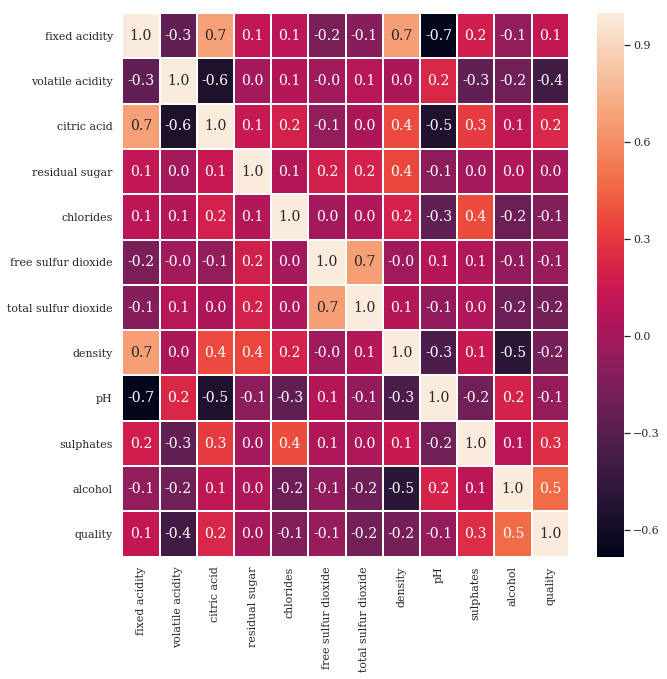

In [403]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)

C:\Python\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


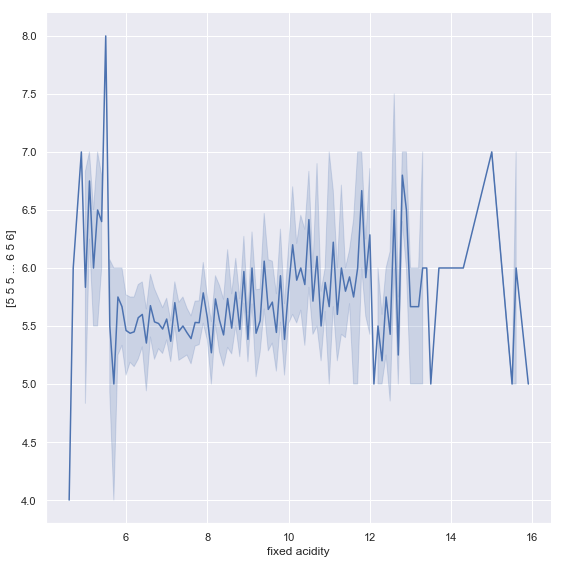

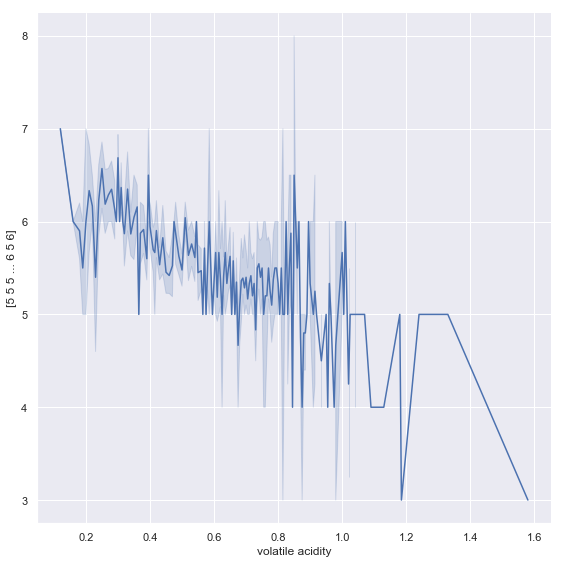

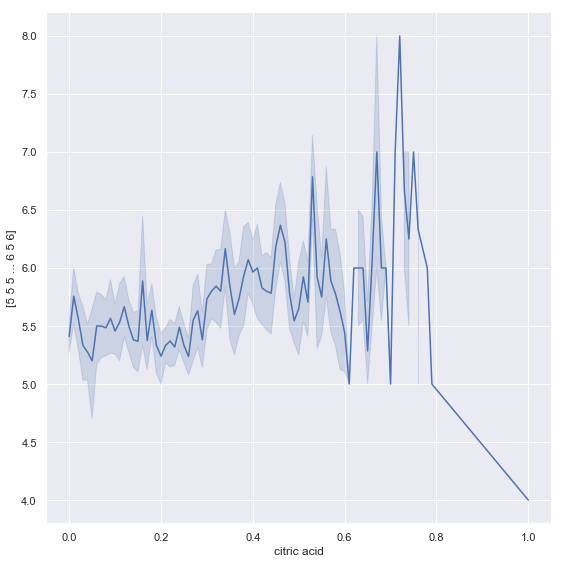

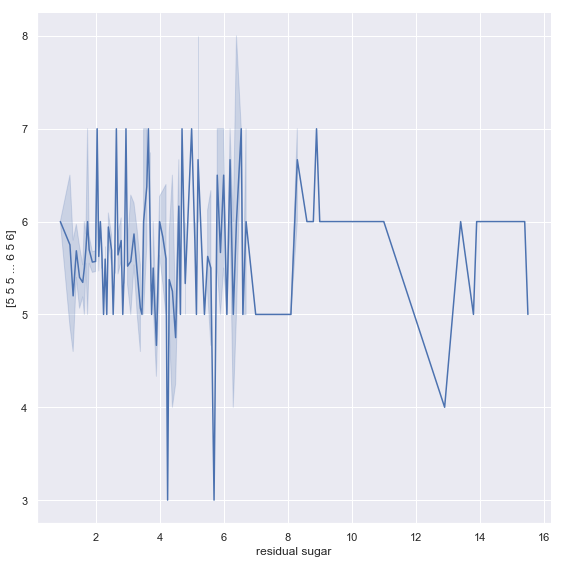

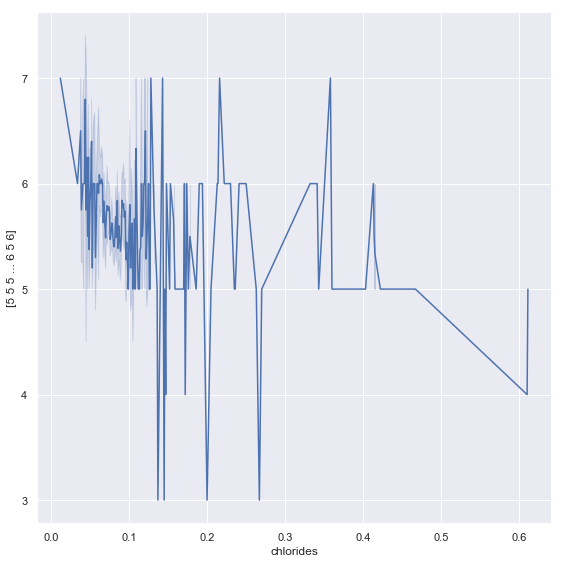

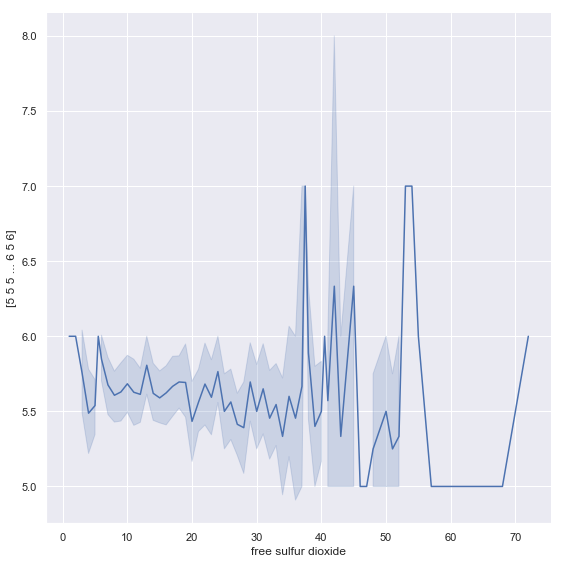

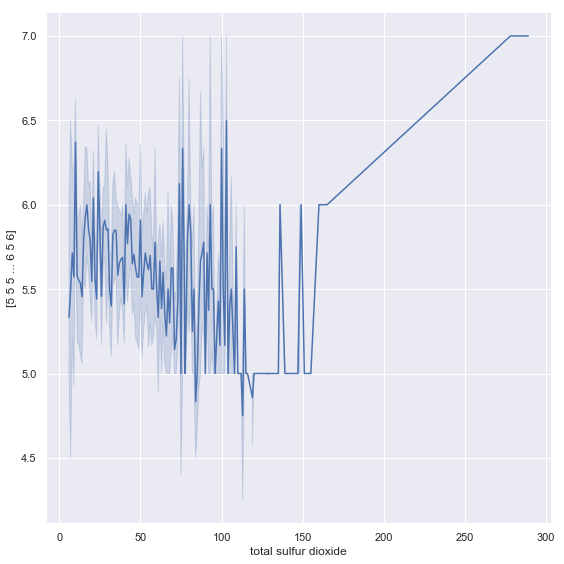

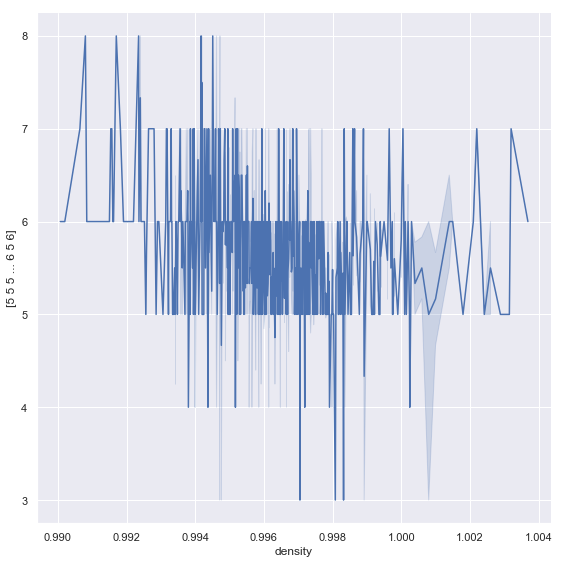

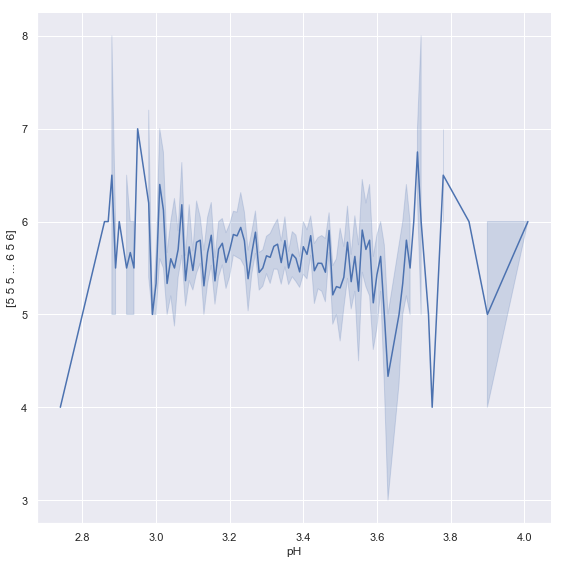

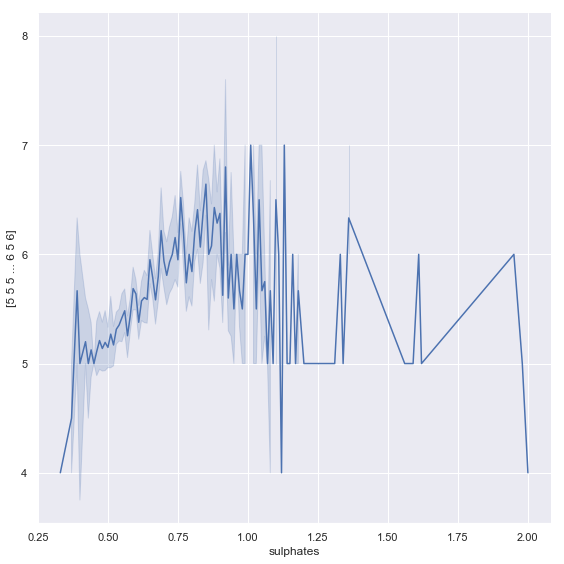

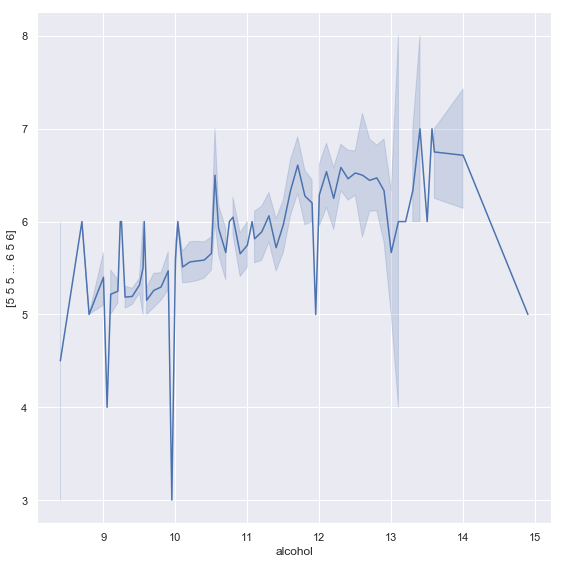

In [404]:
#y = df.quality
#X = df.drop('quality', axis=1)

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for feature in features:
    sns.set()
    sns.relplot(data = df,x = feature, y = y, kind = 'line', height = 8, aspect = 1)

## 3. Dividing your data into a training and test set.

Going to split the training data and testing data on a 80/20 ratio.

In [405]:

#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
                                                    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


## 4. Choosing the relevant algorithm.

#### Decided to test linear regression vs random forest regression.

##### Decided on regression because there are many output values.


In [406]:
lm = LinearRegression()

pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

## 5. Writing a python code to perform learning. 


In [407]:
#linear regression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.intercept_, model.coef_

(26.931300765933337,
 array([ 4.28178608e-02, -1.12214812e+00, -2.65534169e-01,  1.26822261e-02,
        -1.79327314e+00,  5.36365135e-03, -3.23265154e-03, -2.35540727e+01,
        -2.77765613e-01,  9.16315949e-01,  2.87309248e-01]))

In [408]:
#random forest with cross validation
clf = GridSearchCV(pipeline, hyperparameters, cv=5)
clf.fit(X_train, y_train)
scaler = preprocessing.StandardScaler().fit(X_train)

In [409]:
train_predictions = lm.predict(X_train)
test_predictions = lm.predict(X_test)

In [410]:
predictions = np.round_(test_predictions_scaled)
print(predictions)

[6. 6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 5. 6. 7. 6. 5. 7. 6. 5. 5. 6.
 6. 5. 5. 5. 6. 6. 5. 7. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 6. 5. 5. 5.
 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 5. 5. 6. 5. 6.
 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 6. 7. 6. 6. 6. 6. 6. 7. 5. 5. 5.
 6. 7. 5. 7. 5. 6. 5. 6. 5. 5. 5. 4. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 4. 6.
 6. 5. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 8. 5. 5. 7. 6. 5. 5. 5. 6.
 5. 6. 5. 7. 6. 5. 5. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 5. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 6. 5. 6. 5. 5. 6. 6.
 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 5. 5. 7. 6. 7. 6.
 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 5. 6. 6. 6. 5. 5. 7. 6. 6. 5. 6.
 6. 6. 6. 5. 6. 6. 5. 5. 6. 6. 6. 5. 6. 7. 7. 5. 5. 6. 6. 6. 7. 5. 7. 6.
 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 7. 6. 6. 5. 5. 6. 5. 5.
 6. 6. 6. 5. 6. 5. 6. 6.]


Text(0, 0.5, 'Predictions')

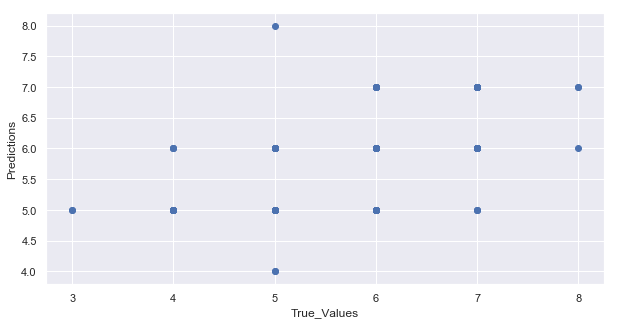

In [411]:
x_span = np.linspace(0, 2, 100)
X_span = x_span.reshape((len(x_span), 1))

plt.scatter(y_test, predictions)
plt.xlabel('True_Values')
plt.ylabel('Predictions')

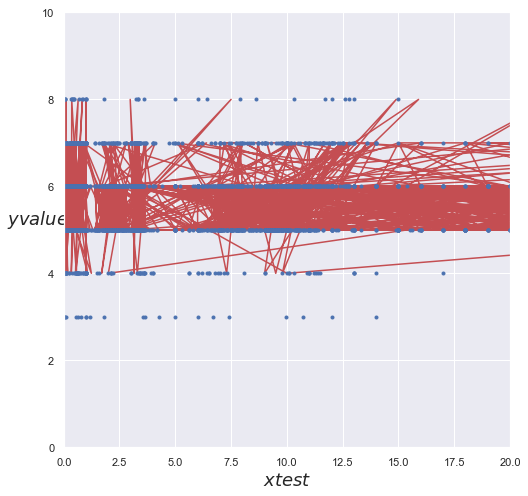

In [412]:
plt.figure(figsize=(8,8))

plt.plot(X_test, predictions, "r-")
plt.plot(X_test, y_test, "b.")
plt.xlabel("$xtest$", fontsize=18)
plt.ylabel("$yvalue$", rotation=0, fontsize=18)

plt.axis([0, 20, 0, 10])


plt.show()

## 6. Evaluating your learning performance.

### Performance for linear regression

In [413]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, train_predictions))
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predictions))

print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, train_predictions))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, test_predictions))

print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

Train Mean Absolute Error: 0.4955245952696055
Test Mean Absolute Error: 0.5167888244191036
Train Mean Squared Error: 0.40935559214288675
Test Mean Squared Error: 0.4500136778926723
Train Root Mean Squared Error: 0.6398090278691656
Test Root Mean Squared Error: 0.6708305880717369


In [414]:
print ('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.30260002699604027


##  <span style="color:red"> Test shows that the mean squared error is close to our training set however the model didn't fair too well </span>

### Performance for random forest

Accuracy: 0.46038864338035
Train Mean Squared Error: 0.04706598905394839
Test Mean Squared Error: 0.348196875


Text(0, 0.5, 'Predictions')

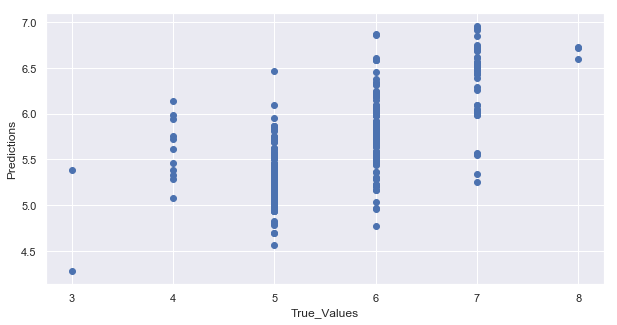

In [415]:
trainpred = clf.predict(X_train)
testpred = clf.predict(X_test)

print ('Accuracy:',r2_score(y_test, testpred))

print ('Train Mean Squared Error:', mean_squared_error(y_train, trainpred))
print ('Test Mean Squared Error:',mean_squared_error(y_test, testpred))


plt.scatter(y_test, testpred)
plt.xlabel('True_Values')
plt.ylabel('Predictions')


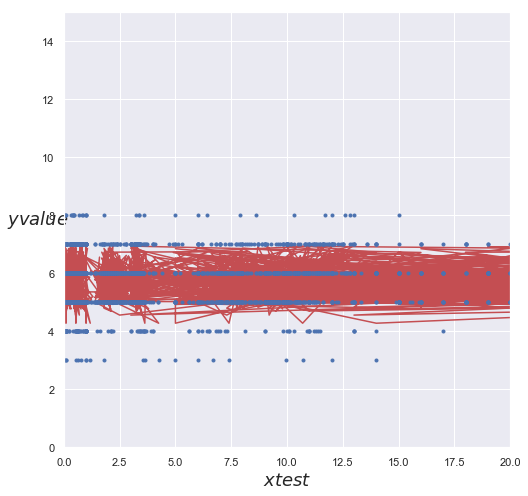

In [416]:
plt.figure(figsize=(8,8))

plt.plot(X_test, testpred, "r-")
plt.plot(X_test, y_test, "b.")
plt.xlabel("$xtest$", fontsize=18)
plt.ylabel("$y value$", rotation=0, fontsize=18)

plt.axis([0, 20, 0, 15])


plt.show()

## <span style="color:green"> Random forest did a little better with a lower mean_squared_error, however the difference between the test and training is greater than linear regression. </span>